In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import random
random.seed(42)

In [216]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [217]:

df = pd.read_csv(r"/Users/frieda/Desktop/Customer_Data.csv")

## Data Cleaning

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

It's worth noting that there are missing values in the "MINIMUM_PAYMENTS" and "CREDIT_LIMIT" columns, which will handling in data cleanning part.

In [219]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Remove missing points 

In [220]:
df.drop(df[df['CREDIT_LIMIT'].isnull() | df['MINIMUM_PAYMENTS'].isnull()].index, axis=0, inplace=True)

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHA

Now, this cleaned dataset is ready for analysis, modeling, or other data-related tasks, and it no longer contains any missing values. 

In [222]:
df.describe(include='all')

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
unique,8636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C10934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,NaN,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,NaN,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,NaN,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,NaN,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000


In [223]:
df2=df.copy()

In [224]:
df2 = df2.drop('CUST_ID', 1)


In [225]:
df2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


## Data Analysis

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

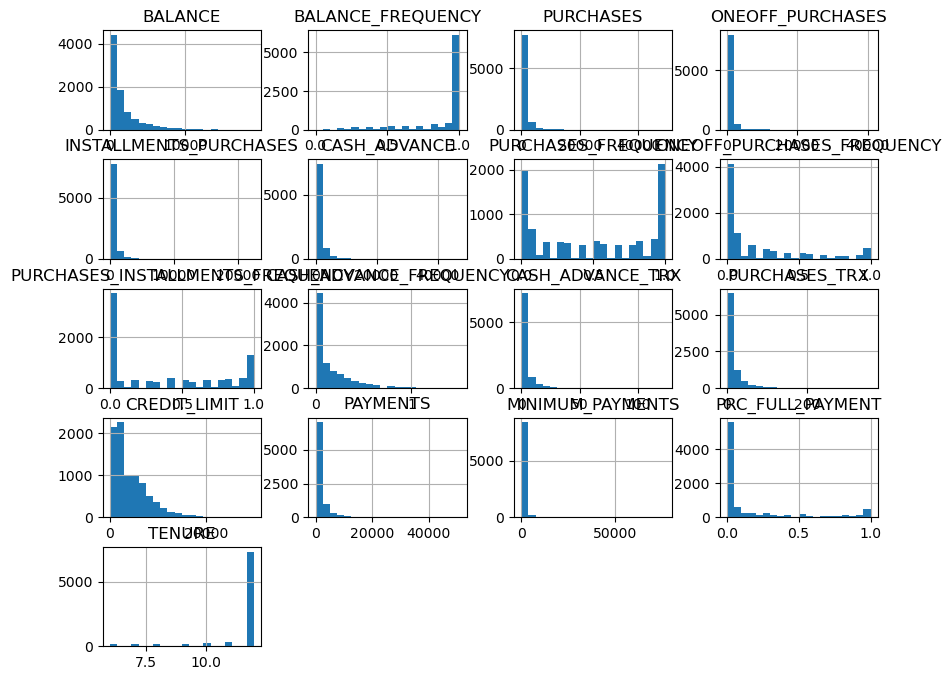

In [227]:
df2.hist(bins=20, figsize=(10, 8))
plt.show()

We utilized histograms to visualize the data distribution of each variable. The histograms revealed variations in the measurement units across different columns. As a result, we found it necessary to normalize the values in each column to ensure consistency and comparability. 

In [228]:

#Normalize values
scaler = StandardScaler()

data = scaler.fit_transform(df2)

data.shape



(8636, 17)

In [229]:
data2 = pd.DataFrame(data, columns=df2.columns)

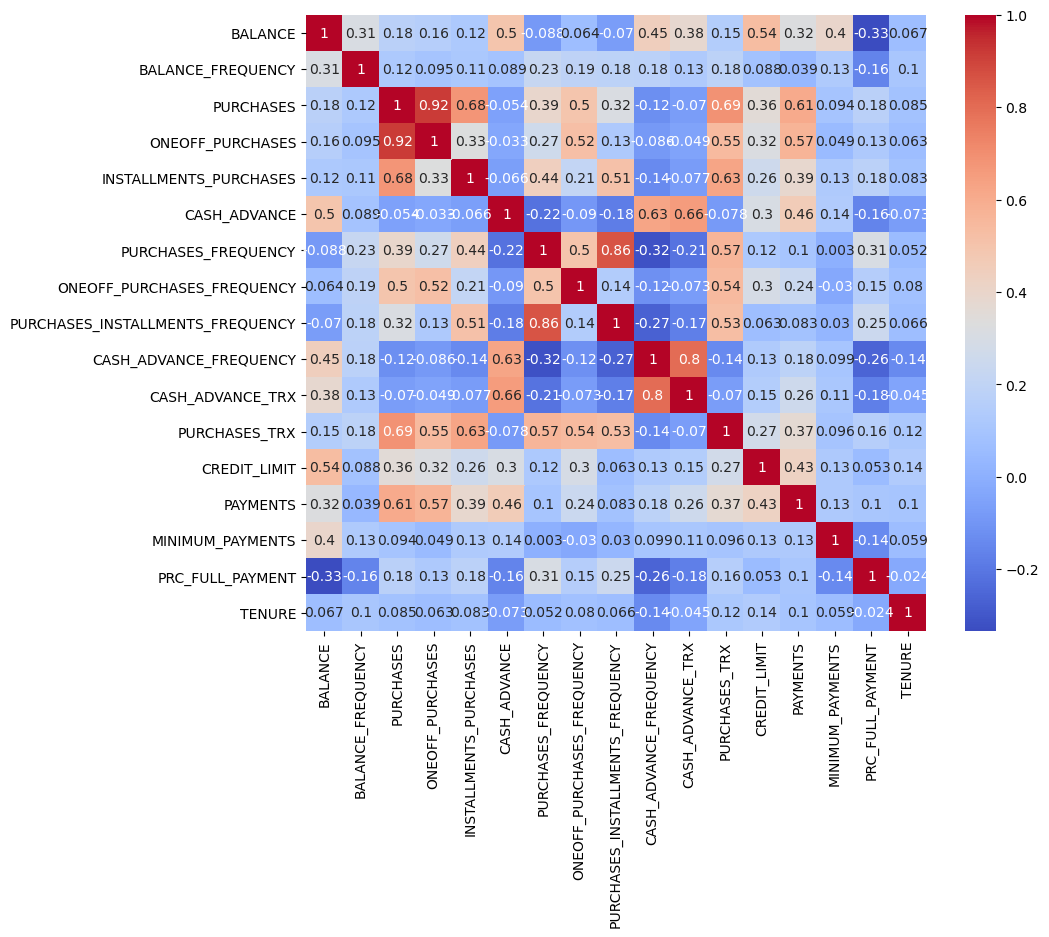

In [230]:
correlation_matrix = df2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In a heatmap, higher numerical values and darker colors usually indicate a more pronounced correlation or connection between two variables. This implies that there is a stronger positive or negative relationship between these two variables. For instance, we observe a strong positive relationship between "PURCHASES_INSTALLMENTS_FREQUENCY" and "PURCHASES_FREQUENCY." Similarly, "CASH_ADVANCE_TRX" and "CASH_ADVANCE_FREQUENCY" also exhibit a strong positive relationship. This could be attributed to their shared association with cash advances and purchases.

## Clustering

In [231]:
del silhouette_score

In [232]:
from sklearn.metrics import silhouette_score

/Users/frieda/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/Users/frieda/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/frieda/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/frieda/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/frieda/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

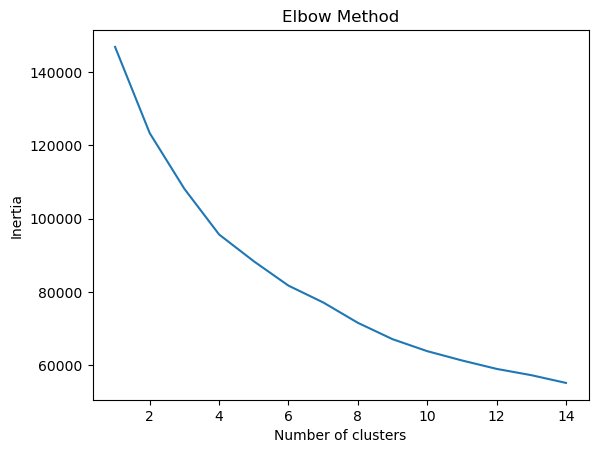

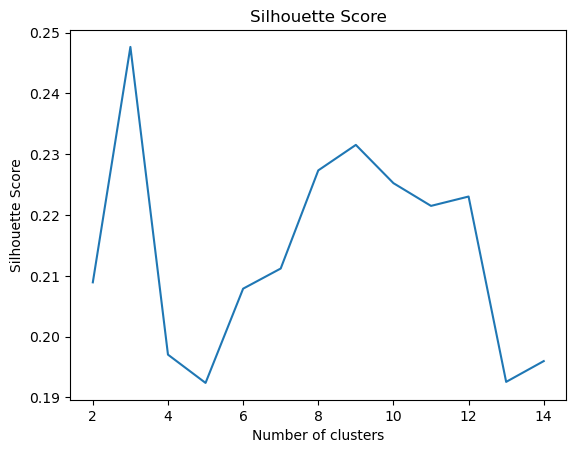

In [233]:
inertia = []
silhouette_avg = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data2)
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    if i>1:
        silhouette_avg = silhouette_avg + [silhouette_score(data2, labels)]

# Silhouette Score

plt.plot(range(1, 15), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


plt.plot(range(2, 15), silhouette_avg)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

The elbow method helps you determine the optimal number of clusters in your data. The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. A higher silhouette score suggests that the object is better matched to its own cluster and poorly matched to neighboring clusters. 

Here the optimal number of clusters for the data maybe 6. This means that, based on these methods, dividing data into 6 clusters provides a good balance between minimizing inertia (in the elbow method) and maximizing the similarity of data points within their own clusters compared to other clusters.

In [234]:
for x in range(2, 7):
    alg = KMeans(n_clusters = x, )
    label = alg.fit_predict(data2)
    print('Silhouette-Score for', x,  'Clusters: ', silhouette_score(data2, label))

/Users/frieda/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette-Score for 2 Clusters:  0.20892328220228673


/Users/frieda/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette-Score for 3 Clusters:  0.24709726016009056


/Users/frieda/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette-Score for 4 Clusters:  0.1970676472017997


/Users/frieda/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette-Score for 5 Clusters:  0.1921796237973153


/Users/frieda/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette-Score for 6 Clusters:  0.2074588749696248


In this code, a loop ranging from 2 to 6 clusters is applied to a KMeans clustering algorithm. For each cluster count, the silhouette score is calculated to assess the quality of the clustering. The silhouette score helps determine how well data points are clustered, with higher scores indicating better clustering. 

The results are as follows:
- Silhouette-Score for 2 Clusters: 0.2089
- Silhouette-Score for 3 Clusters: 0.2476
- Silhouette-Score for 4 Clusters: 0.1970
- Silhouette-Score for 5 Clusters: 0.1919
- Silhouette-Score for 6 Clusters: 0.2073

We can find the score values for all clusters are all around 0.2.

In [235]:
K = 6
kmeans = KMeans(n_clusters=K, random_state=0).fit(data2)

/Users/frieda/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


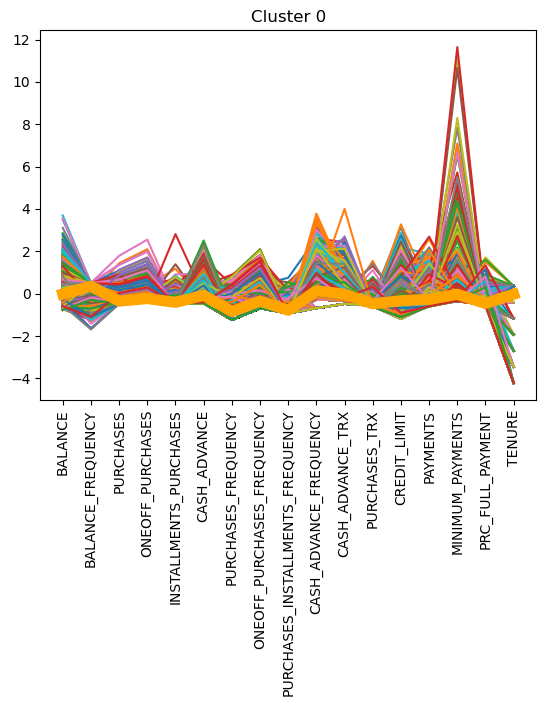

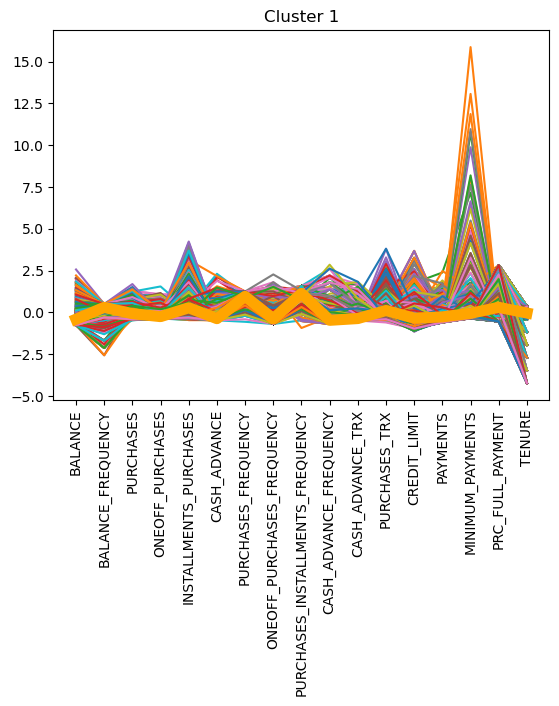

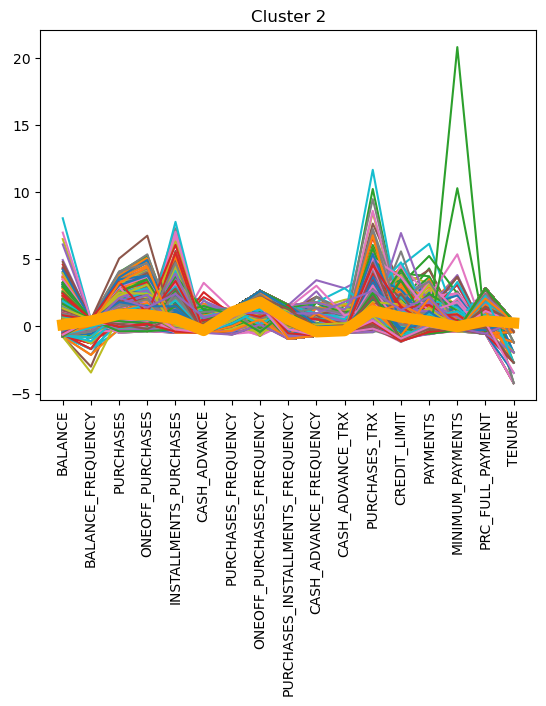

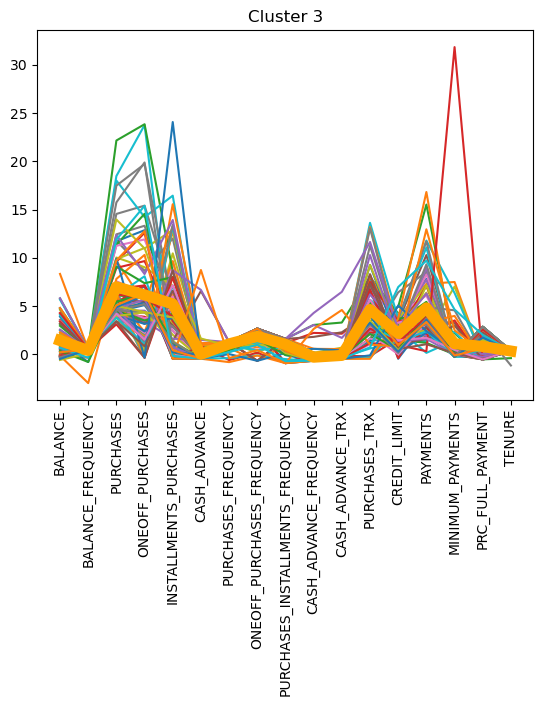

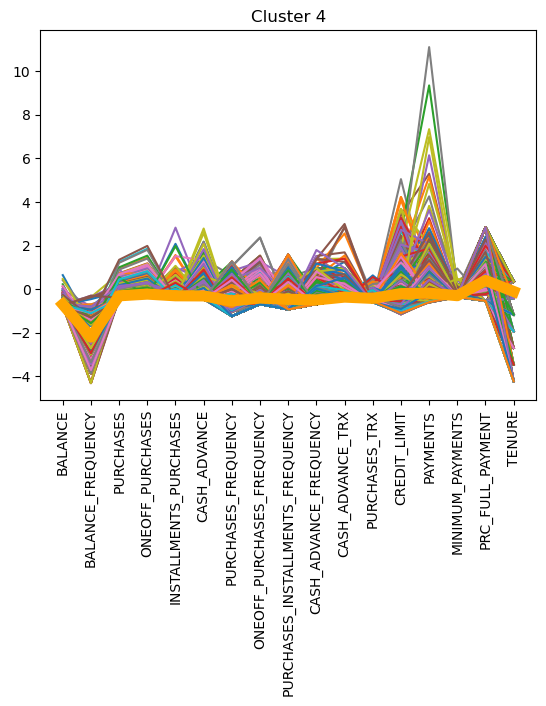

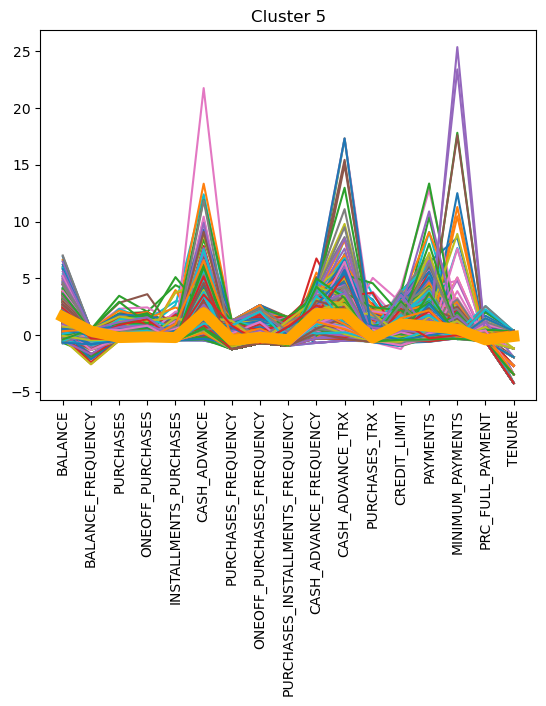

In [236]:
import numpy as np

# Create plots
for c in range(K):
    # Subset the data for the current cluster
    cluster_data = data2[kmeans.labels_ == c]

    # Transpose and plot the cluster data
    cluster_data.T.plot(legend=False)
    
    # Set the x-axis tick positions and labels
    x_ticks = np.arange(len(cluster_data.columns))
    x_labels = cluster_data.columns  # Replace with your own labels if needed

    # Plot the cluster center in orange
    plt.plot(kmeans.cluster_centers_[c], linewidth=8, color='orange')
    
    # Set the title for the current cluster
    plt.title("Cluster " + str(c))
    
    # Set the x-axis ticks and labels
    plt.xticks(x_ticks, x_labels, rotation=90)  # Rotate labels for better visibility

# Show the plots
plt.show()


Upon further investigation into each cluster, it becomes evident that the visual representations of these clusters do not appear favorable. The graphs exhibit an abundance of data points, which may make it challenging to extract meaningful insights. To address this issue, the application of Principal Component Analysis (PCA) is considered as a potential solution. PCA can help reduce the dimensionality of the data and simplify the visualization, making it more manageable and interpretable.

In [237]:
from sklearn.decomposition import PCA

In [238]:
pd.set_option('display.max_colwidth', None)


In [239]:

results = []

for y in range(2, 5):
    pca_result = {"PCA Components": y}
    for x in range(2, 7):
        alg = KMeans(n_clusters=x)
        label = alg.fit_predict(df2)
        silhouette = silhouette_score(df2, label)
        inertia = alg.inertia_
        pca_result[f'Clusters {x}'] = f"Silhouette: {silhouette}, Inertia: {inertia}"
    results.append(pca_result)

df = pd.DataFrame(results)
print(df)


/Users/frieda/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/frieda/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/frieda/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/frieda/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

   PCA Components                                                 Clusters 2  \
0               2  Silhouette: 0.511307699456009, Inertia: 274951819531.6047   
1               3  Silhouette: 0.511307699456009, Inertia: 274951819531.6047   
2               4  Silhouette: 0.511307699456009, Inertia: 274951819531.6047   

                                                     Clusters 3  \
0  Silhouette: 0.46479231041710206, Inertia: 229257585444.70728   
1   Silhouette: 0.4649592292907119, Inertia: 229258024340.36475   
2   Silhouette: 0.4649592292907119, Inertia: 229258024340.36475   

                                                     Clusters 4  \
0   Silhouette: 0.4630308355226491, Inertia: 203205680402.17984   
1  Silhouette: 0.46049569919279437, Inertia: 203216034212.27216   
2   Silhouette: 0.4642409477166819, Inertia: 203026349397.88428   

                                                    Clusters 5  \
0  Silhouette: 0.3945384942220076, Inertia: 177957366860.14932   
1  Silhou

According to the table, PCA = 2, cluster = 6 is the best 

/Users/frieda/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


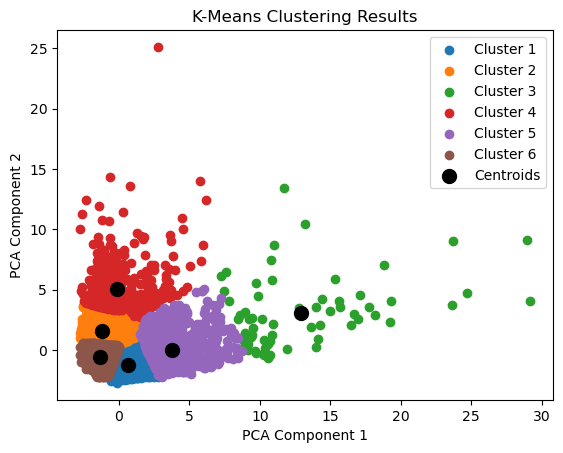

In [240]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Perform PCA with 2 components
pca = PCA(n_components=2)
data2_pca = pca.fit_transform(data2)

# Apply K-means clustering with 6 clusters
kmeans = KMeans(n_clusters=6)
kmeans.fit(data2_pca)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Scatter plot the data points with different colors for each cluster
for cluster in range(6):
    plt.scatter(data2_pca[labels == cluster, 0], data2_pca[labels == cluster, 1], label=f'Cluster {cluster + 1}')

# Plot cluster centers
plt.scatter(centers[:, 0], centers[:, 1], s=100, c='black', label='Centroids')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()


Through the utilization of the K-Means clustering method with PCA set to 2 components and a cluster count of 6, we successfully identified and determined the centroids for these six distinct clusters.

In the graph, we observe that the clusters are densely packed in the lower left corner, indicating a high concentration of data points in that region. However, clusters 5 and 6 appear to be more spread out, with data points distributed over a larger area. This suggests that clusters 5 and 6 have a lower density and cover a wider range compared to the other clusters, which are more tightly grouped.

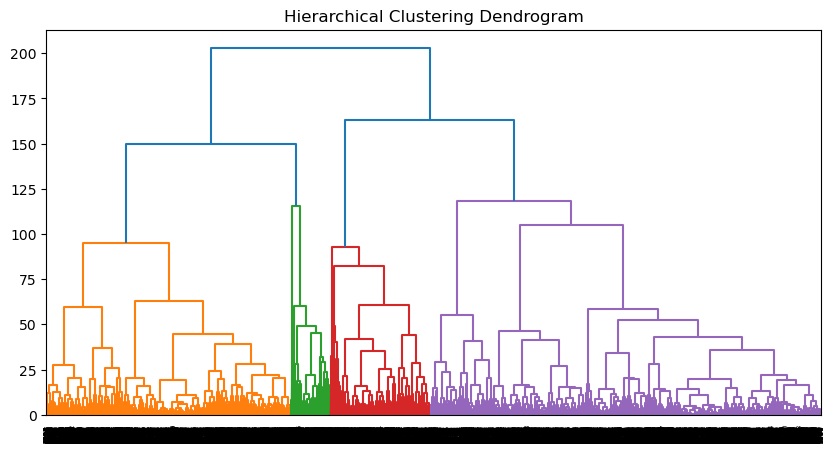

In [241]:
# Importing required libraries
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate linkage matrix
Z = linkage(data2, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


Through hierarchical clustering, we identified the presence of 4 distinct clusters. Additionally, the number of tails, or data points with relatively few neighboring points, is quite numerous and challenging to quantify.

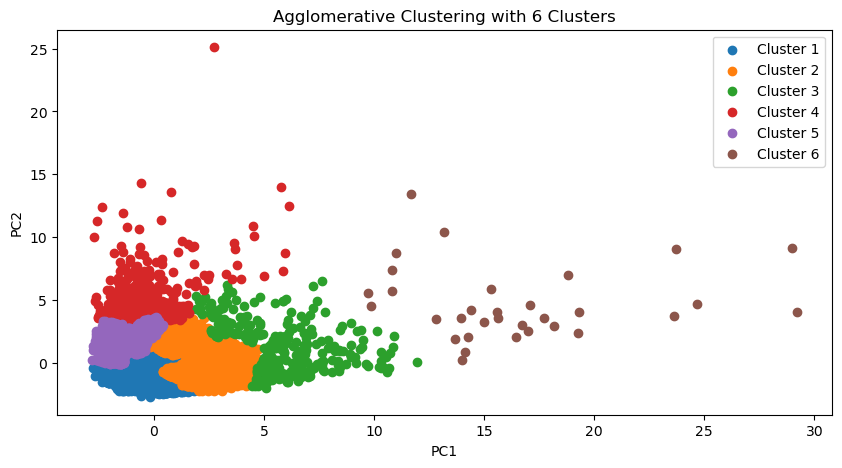

In [242]:
data3 = pd.DataFrame(PCA(n_components = 2).fit_transform(data2))
preds = pd.Series(AgglomerativeClustering(n_clusters = 6,).fit_predict(data3))
data3 = pd.concat([data3, preds], axis =1)
data3.columns = [0,1,'target']

plt.figure(figsize=(10, 5))
for cluster in range(6):
    plt.scatter(data3[data3['target'] == cluster].iloc[:, 0], data3[data3['target'] == cluster].iloc[:, 1], label=f'Cluster {cluster + 1}')

plt.legend()
plt.title('Agglomerative Clustering with 6 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


When we applied agglomerative clustering with 6 clusters and PCA equal to 2, the observed clustering trend resembled the results obtained using k-means. However, there was a significant difference: the clusters appeared to be more dispersed.

This variation can be attributed to the fundamental differences between agglomerative and k-means clustering methods. Agglomerative clustering starts with individual data points as clusters and then gradually merges them into larger clusters, potentially leading to more spread-out clusters when applied to our dataset.

In contrast, k-means assigns each data point to the nearest centroid, which can result in more tightly grouped clusters.

In summary, K-means is my favored when seeking compact, well-defined clusters, making it easier to explain each cluster effectively. 

## EDA

In [243]:
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "PRC_FULL_PAYMENT", "PAYMENTS", "MINIMUM_PAYMENTS"]

I choose below columns as the columns to do EDA: 

BALANCE: This refers to the remaining balance in the cardholder's account that can be used for making purchases.

PURCHASES: This is the total amount of purchases made from the account.

CASH ADVANCE: This is the amount of cash in advance given by the user.

PAYMENTS: This is the total amount of payment made by the user.

MINIMUM_PAYMENTS: This is the minimum amount of payment made by the user.

PRC_FULL_PAYMENT: This indicates the percentage of full payment made by the user.

These columns collectively provide a comprehensive view of cardholders' financial behavior, which is vital for understanding their credit card usage patterns and identifying any anomalies or trends that may be present in the data.

In [244]:


data4 = pd.DataFrame(data2[best_cols])

print(str(data4.shape))

(8636, 6)


/Users/frieda/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


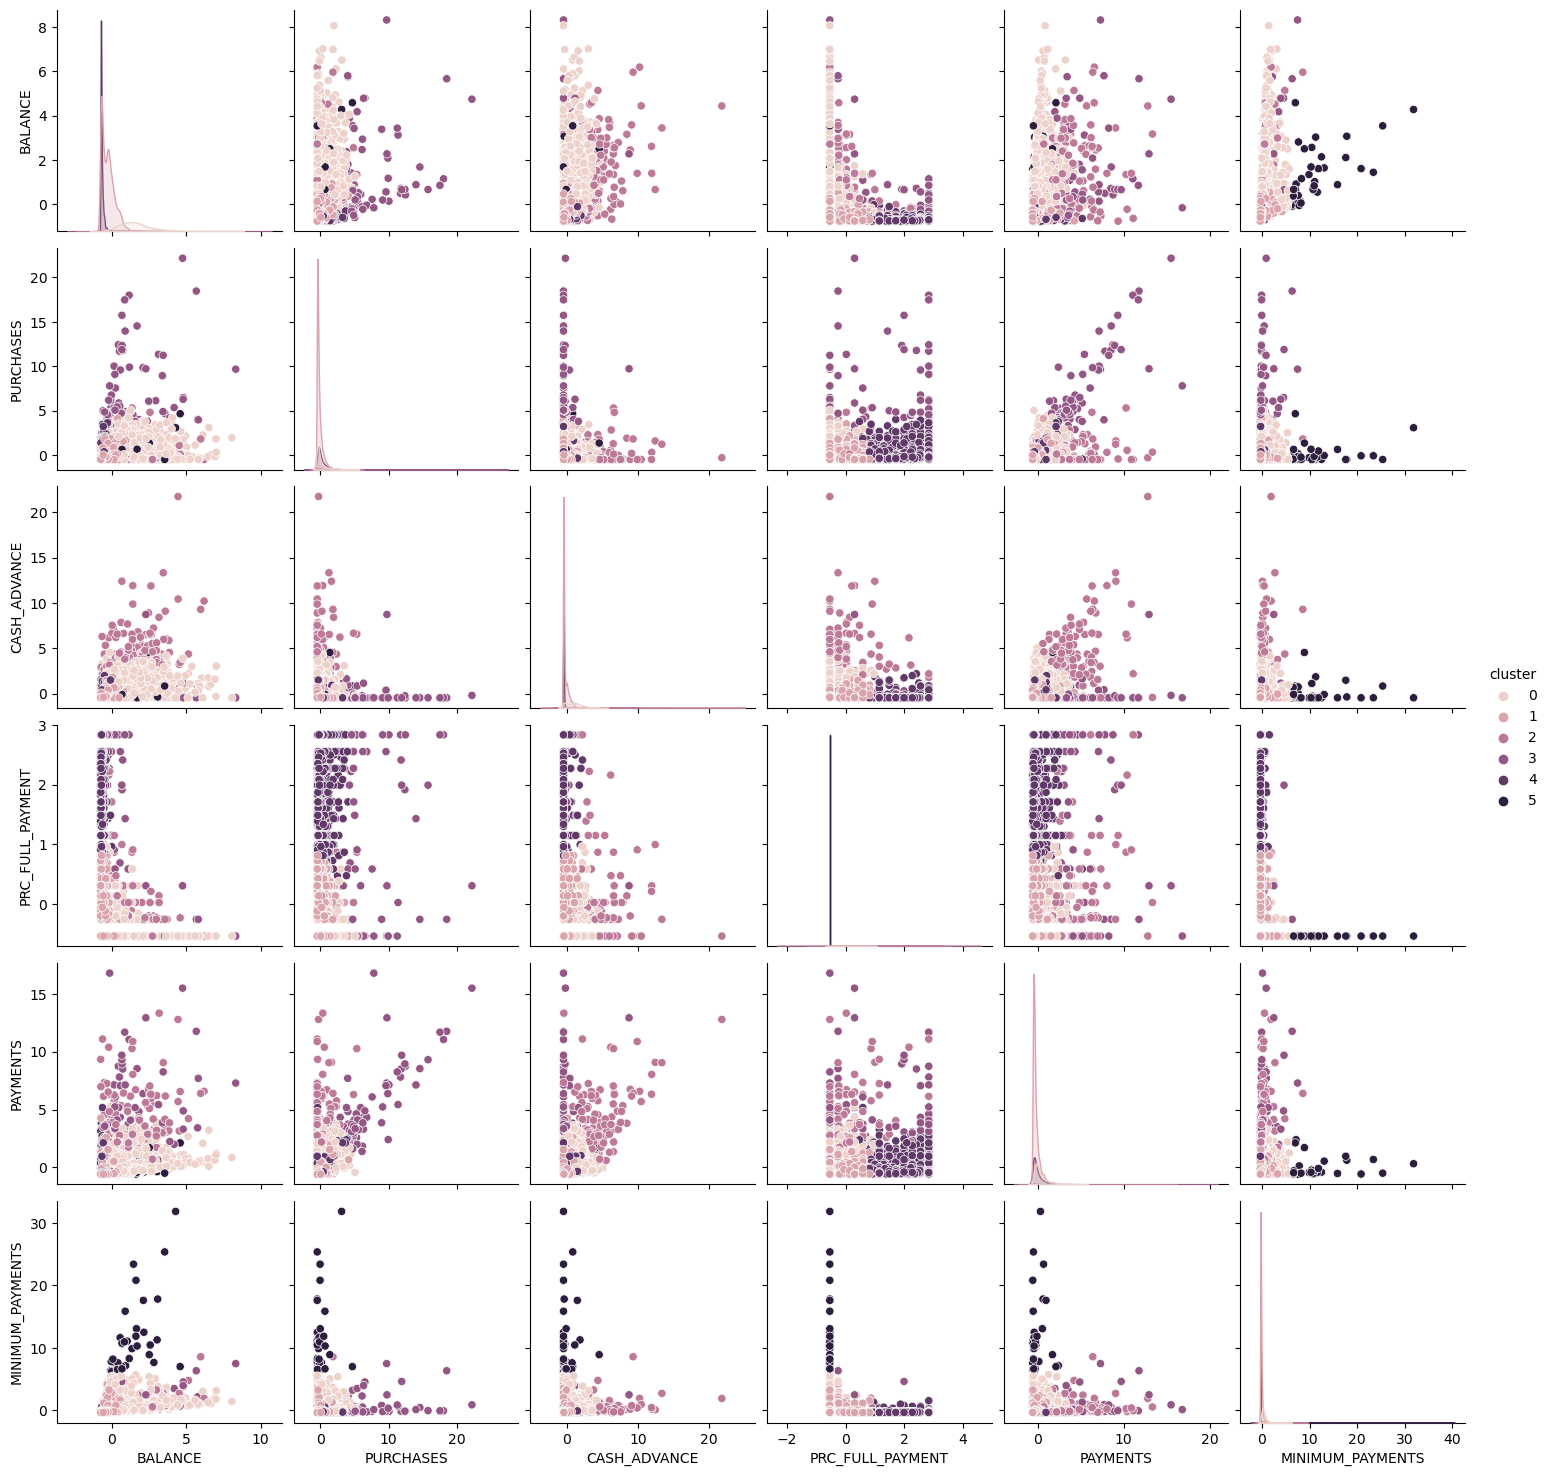

In [245]:

dd = KMeans(n_clusters = 6)
ee = dd.fit_predict(data4)

data4['cluster'] = ee
best_cols.append('cluster')

sns.pairplot(data4[best_cols], hue='cluster')

Now we do analysis for each cluster

Cluster 0 

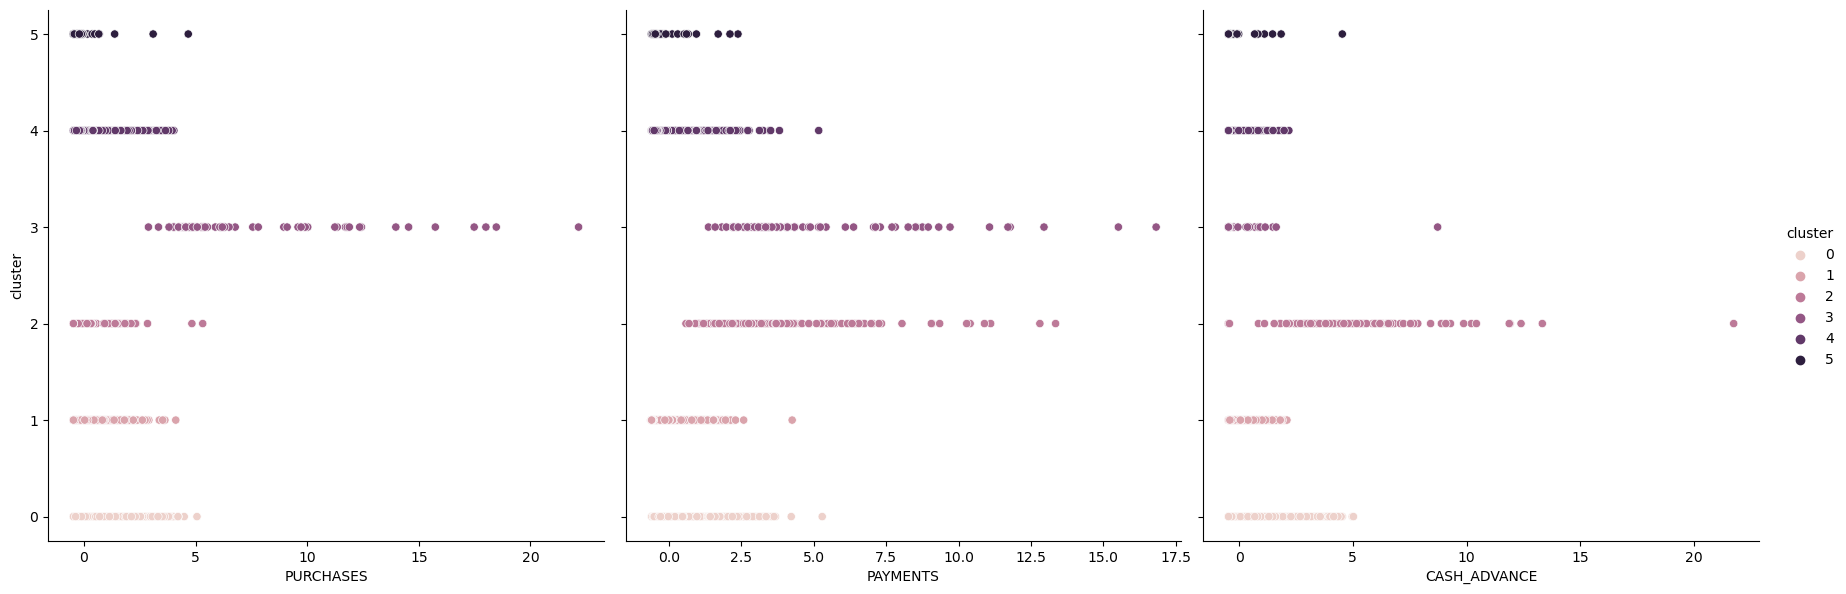

In [251]:
sns.pairplot(data4[best_cols], hue='cluster', x_vars=['PURCHASES', 'PAYMENTS', 'CASH_ADVANCE'],
            y_vars=['cluster'],
            height=6, aspect=1)

Within Cluster 0, the largest user population is observed, characterized by lower purchase activity, the second lowest payment behavior, and moderate cash advance usage. To enhance this cluster's spending behavior, they could consider tailored strategies, such as personalized offers, rewards, or credit limit increases, to incentivize these users to spend more. Additionally, providing financial education and support to help users understand the benefits of responsible credit card use may also be beneficial.

Cluster 1

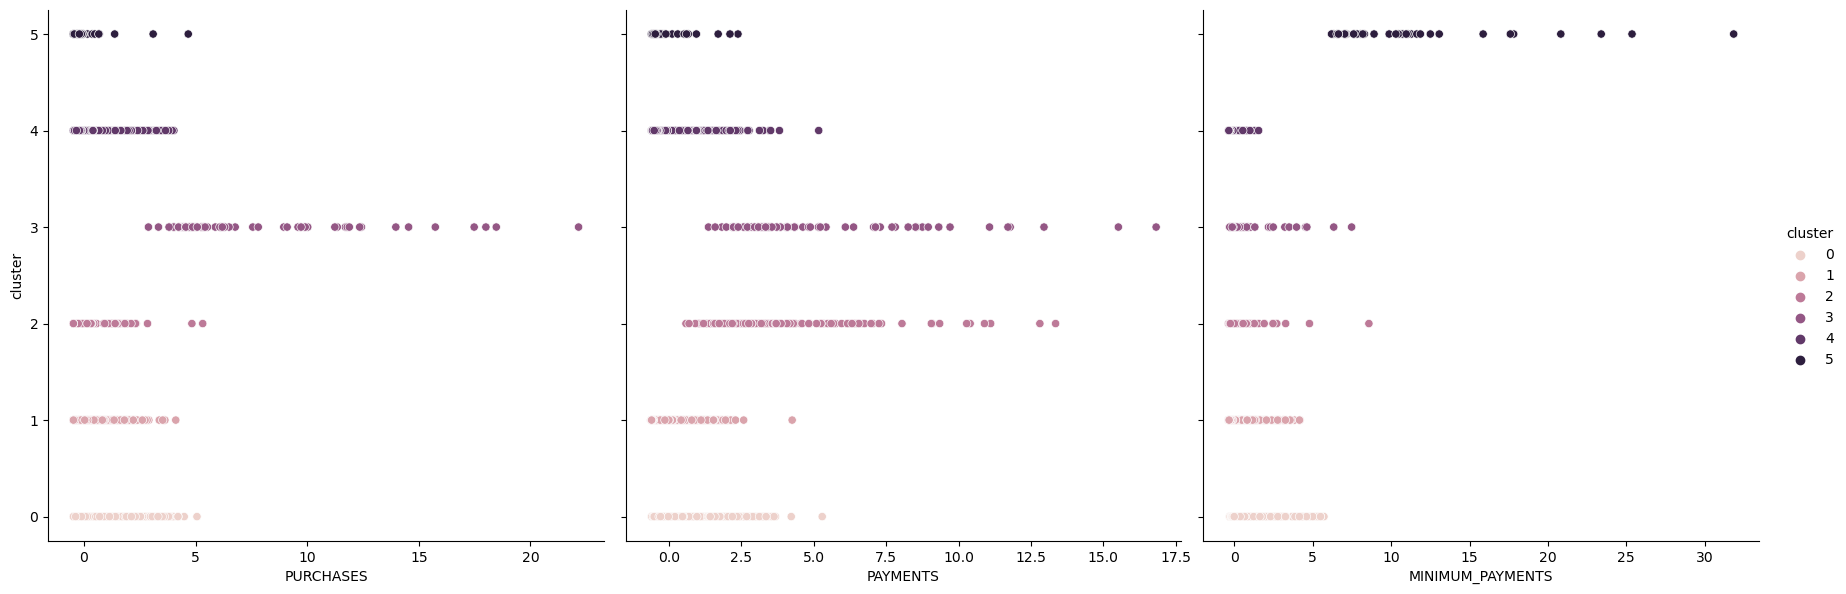

In [253]:
sns.pairplot(data4[best_cols], hue='cluster', x_vars=['PURCHASES', 'PAYMENTS', 'MINIMUM_PAYMENTS'],
            y_vars=['cluster'],
            height=6, aspect=1)

Overall, we can say these customers are similar with customers from cluster 0, so we can use same strategy. 

Cluster 2

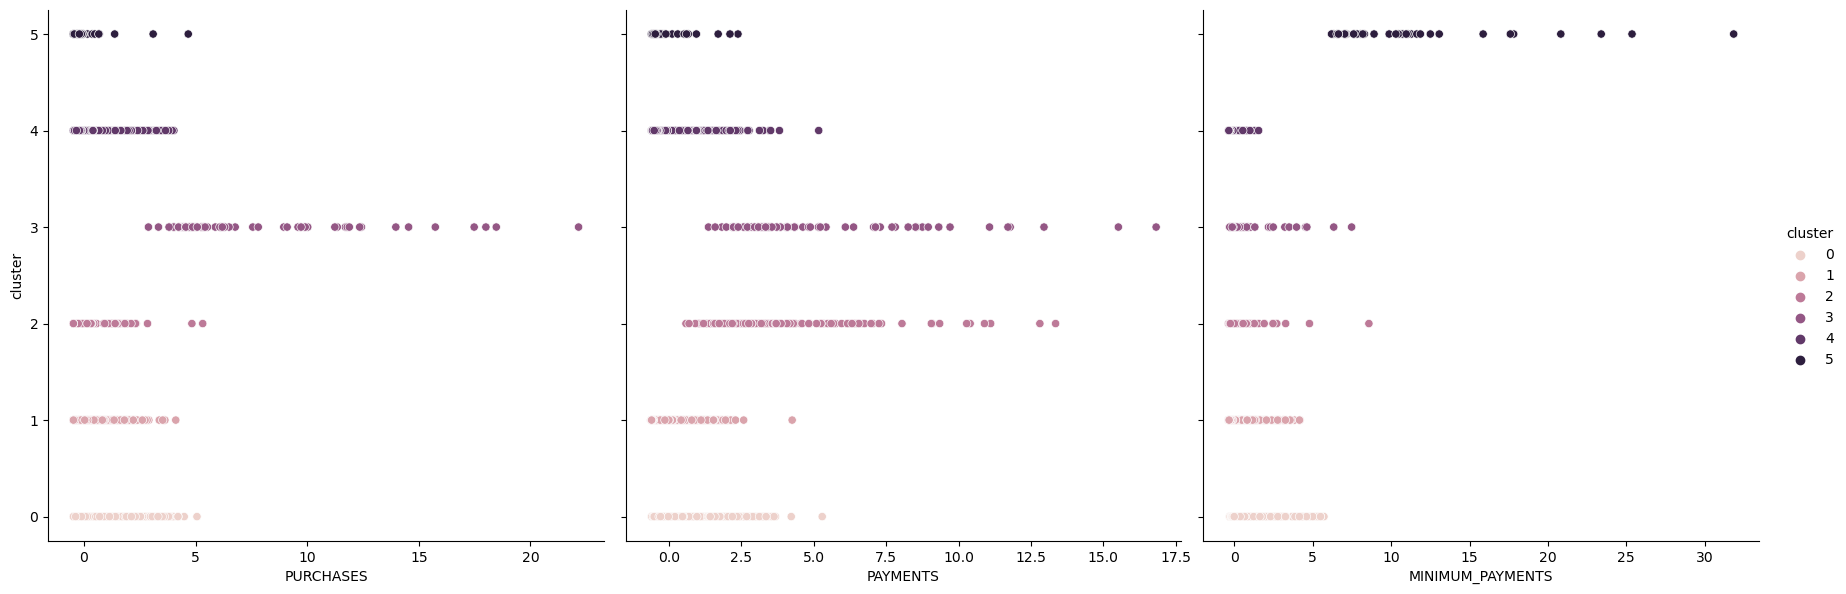

In [254]:
sns.pairplot(data4[best_cols], hue='cluster', x_vars=['PURCHASES', 'PAYMENTS', 'MINIMUM_PAYMENTS'],
            y_vars=['cluster'],
            height=6, aspect=1)

In this particular group, we observe the second-highest payment activity and a significant level of purchases. This group warrants closer analysis, and it's important to pay extra attention to their behavior. However, we must also address the presence of outliers within this group. 

Overall, To enhance our understanding and derive valuable insights, conducting a detailed analysis of this subgroup is recommended. Addressing the outliers will be essential to ensure that the analysis accurately represents the group's behavior.

Cluster 3

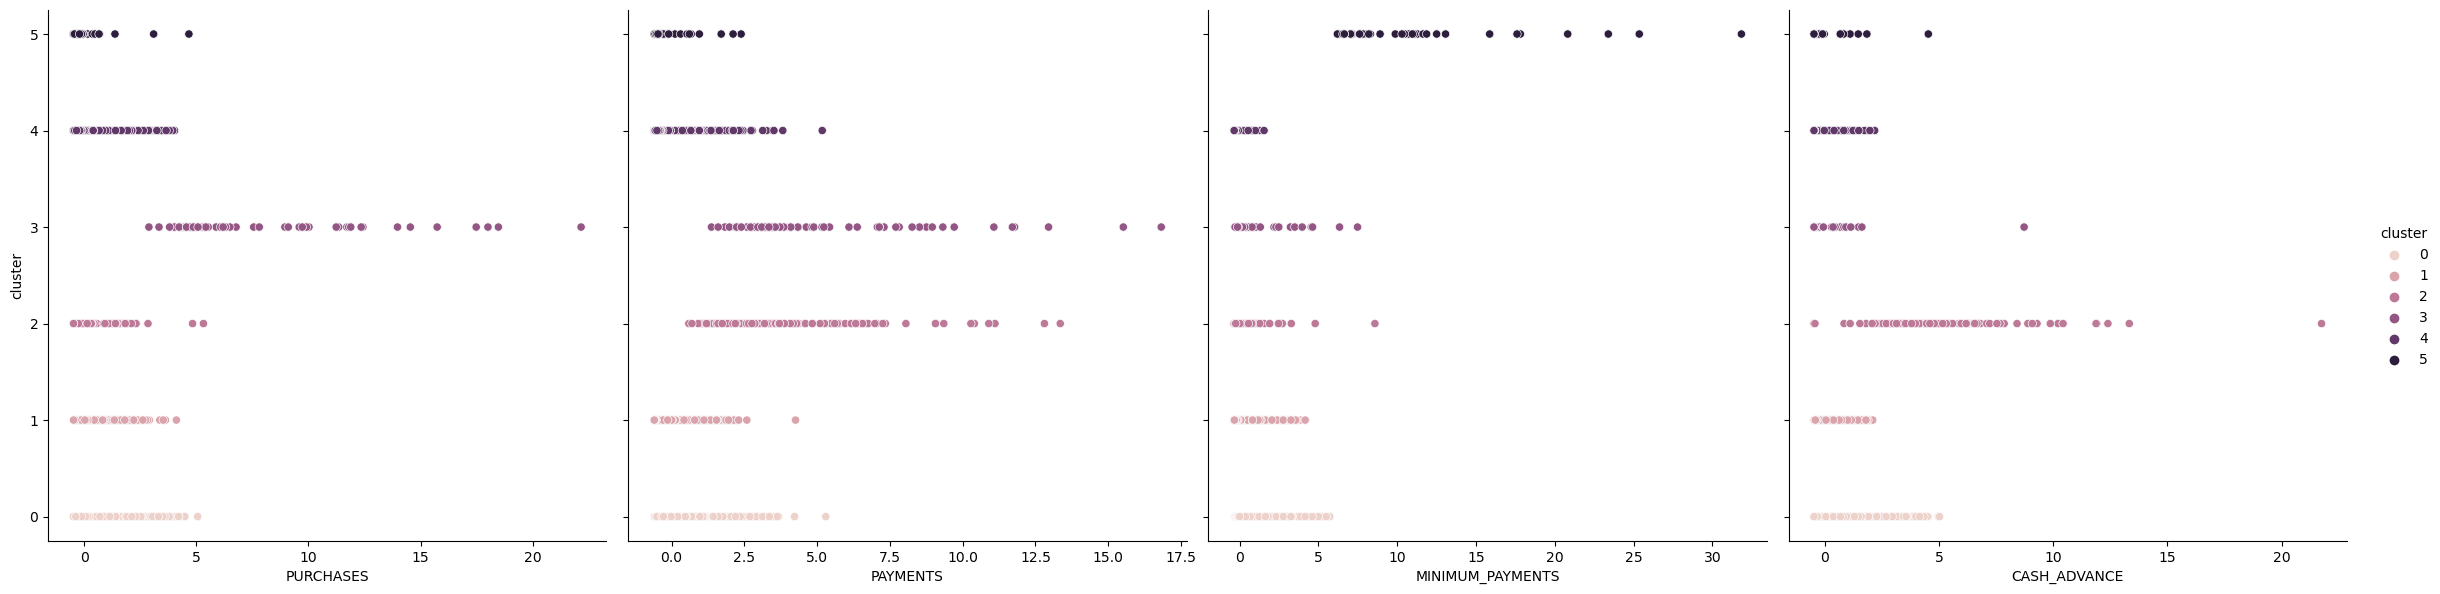

In [256]:
sns.pairplot(data4[best_cols], hue='cluster', x_vars=['PURCHASES', 'PAYMENTS', 'MINIMUM_PAYMENTS','CASH_ADVANCE'],
            y_vars=['cluster'],
            height=6, aspect=1)

Cluster 3 exhibits a similar trend to that of Cluster 2. Notably, Cluster 3 displays the highest levels of both payments and purchases.

Cluster 4 and 5

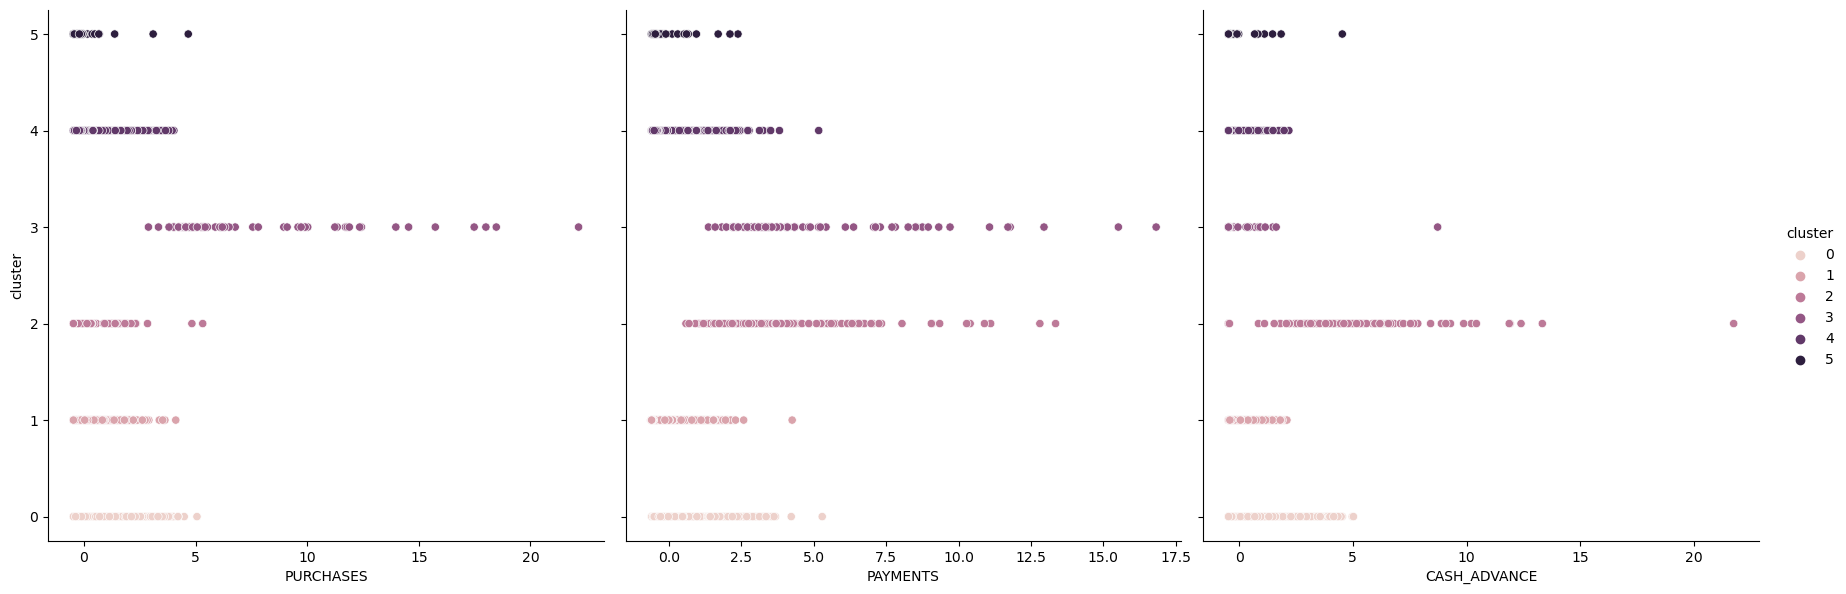

In [257]:
sns.pairplot(data4[best_cols], hue='cluster', x_vars=['PURCHASES', 'PAYMENTS', 'CASH_ADVANCE'],
            y_vars=['cluster'],
            height=6, aspect=1)

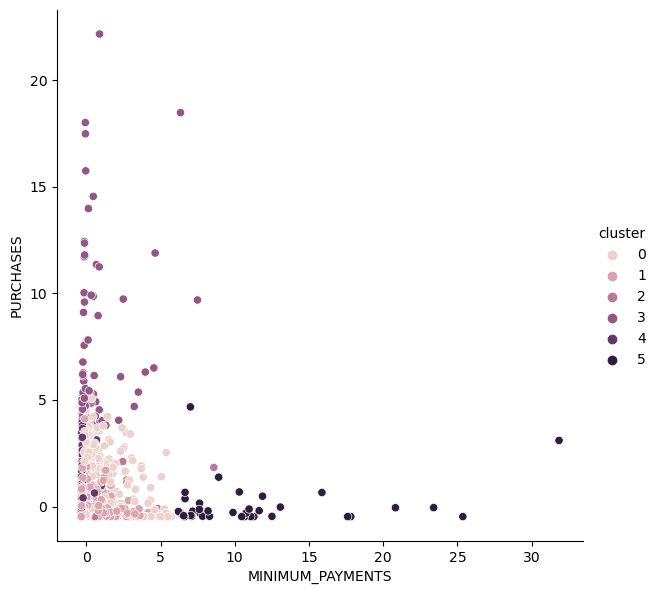

In [260]:
sns.pairplot(data4[best_cols], hue='cluster', x_vars=['MINIMUM_PAYMENTS'], y_vars=['PURCHASES'],
            height=6, aspect=1)

Based on the graphs above, it's evident that individuals in Cluster 4 and 5 pose a higher level of risk compared to other clusters. In particular, Cluster 5 stands out due to the significant presence of outliers, which complicates the analysis and strategy development process.

## Business recommendations



Cluster 0 and 1:
For customers in Cluster 0, focus on promoting responsible spending by offering tailored financial education and credit management resources. Consider providing personalized incentives, rewards, or credit limit increases to encourage higher spending. Engage these users with targeted marketing campaigns to showcase the benefits of credit card usage.

Cluster 2:
Conduct a comprehensive analysis of this group to better understand their behavior and preferences. Develop customized marketing and product offerings based on their specific interests and spending patterns. Pay close attention to outliers within this cluster to ensure an accurate representation of the group's behavior.

Cluster 3:
Provide high-value customers in Cluster 3 with exclusive benefits, loyalty programs, and top-tier customer service Maintain regular communication to keep them satisfied and engaged with your services. Encourage them to explore additional financial products and services offered by your institution.

Clusters 4 and 5:
Focus on risk management and fraud prevention strategies to safeguard both customers and the institution. Implement robust security measures, anomaly detection, and continuous monitoring for unusual activities. Regularly assess the risk level of these clusters and promptly address any suspicious transactions or activities.
